# **HEART ATTACK RATE ANALYSIS**

****Importing Modules****

In [55]:
import numpy as np 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


****ADDING DATA****

In [56]:
data_filepath = "/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv"
data = pd.read_csv(data_filepath)
print(data.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


**CHECKING FOR NULL DATA : **
If there is more null data, analysis may not be accurate.

In [57]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

****CHECKING RELATION BETWEEN AGE AND CHOLESTROL****

<AxesSubplot:title={'center':'PLOT BETWEEN AGE AND CHOLESTROL'}, xlabel='age', ylabel='chol'>

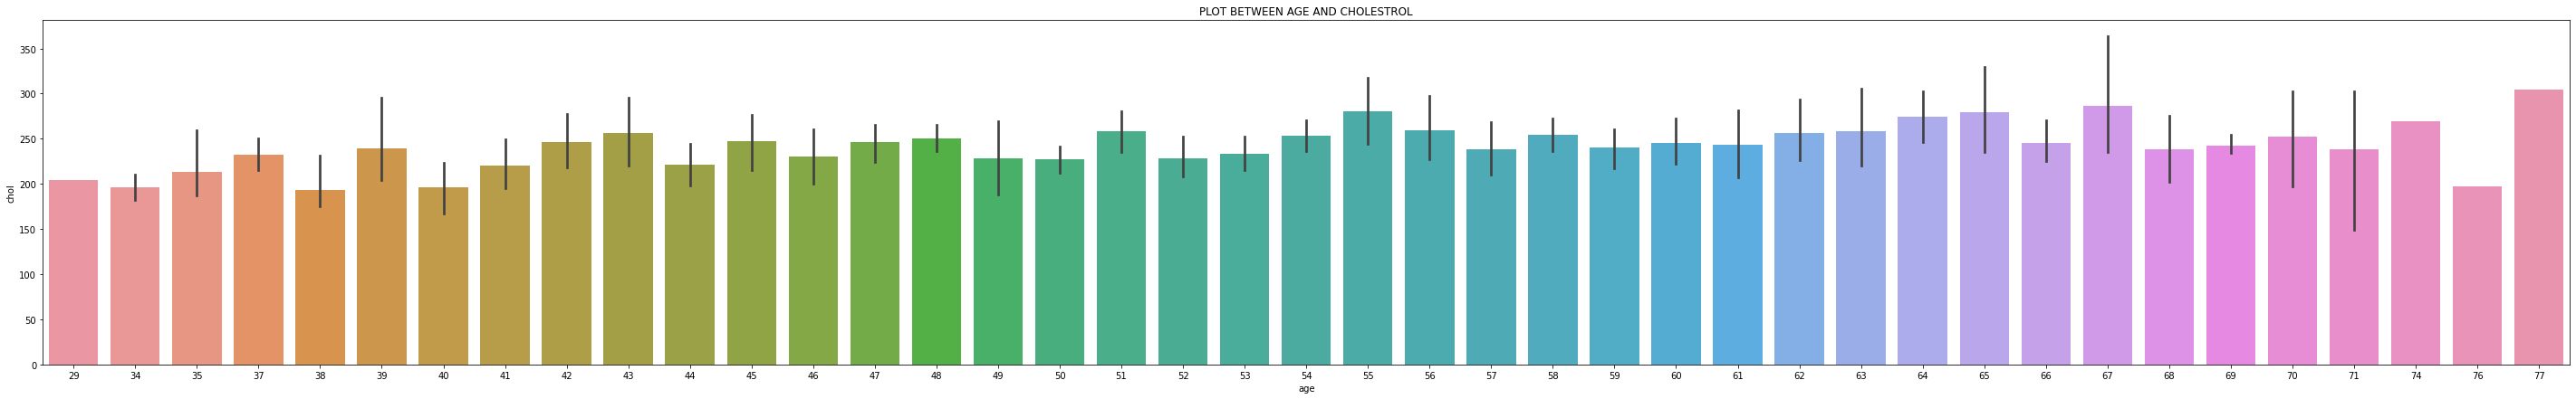

In [58]:
plt.figure(figsize=(50,7))
plt.title("PLOT BETWEEN AGE AND CHOLESTROL")
sns.barplot(x = data["age"],y=data["chol"])

No such relation between age and cholestrol.

**CHECKING RELATION BETWEEN GENDER AND CHANCE OF GETTING HEART ATTACK**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BAR PLOT BETWEEN GENDER AND OUTPUT')

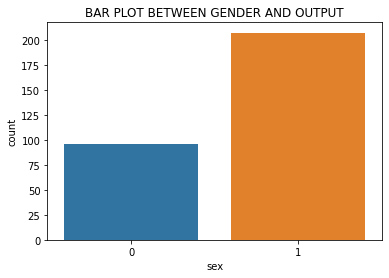

In [59]:
sns.countplot("sex",data=data)
plt.title("BAR PLOT BETWEEN GENDER AND OUTPUT")

From the data,the probability of getting heart attack for male will be more when compered to female.

****CHECKING RELATION BETWEEN BLOOD PRESSURE AND HEART ATTACK ****

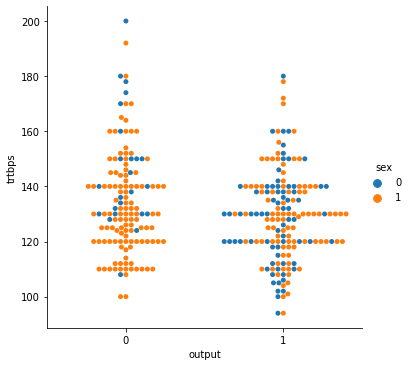

In [60]:
sns.catplot(x="output",y="trtbps",hue="sex",kind="swarm",data=data)

**The blood pressure level is between 120 and 140 in most of the heart attack cases reported.**

****CKECKING RELATION BETWEEN HEART ATTACK AND CHOLESTROL****

<AxesSubplot:>

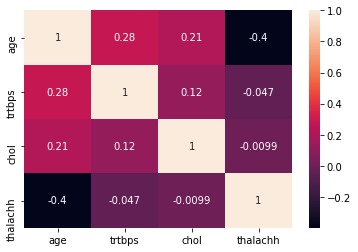

In [61]:
df=data.drop(["sex","cp","fbs","caa","slp","restecg","exng","thall","output","oldpeak"],axis=1,inplace=False)
corrmat=df.corr()
sns.heatmap(corrmat,annot=True)

We can with age cholestrol and blood pressure increases while maximmum heart rate decreases.
**Cholestrol and blood pressure have almost negligible effect on maximum heart rate.**
Cholestrol and blood pressure has correlation factor only 0.12. So they are
positively realted to each other but does not effect each other significantly
Conclusion: If a 40 year or more person having 
(i) chest pain other than typical angina 
(ii) low blood sugar level 
(iii) number of major vessels is 2 or 3 
(iv) maximum heart rate 2 will be extremely vulnerable to heart attack. 
Vulnerablility will be more in case of females than males.


****CHECKING RELATION BETWEEN HEART ATTACK AND OLDPEAK****

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


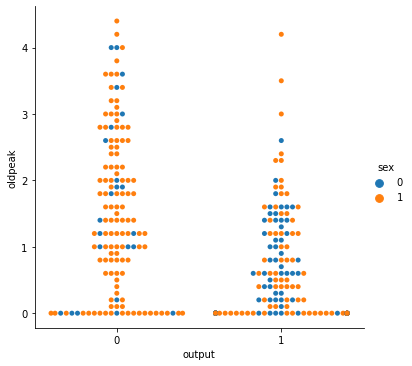

In [62]:
data.drop(data[data["oldpeak"]>4.5].index,axis=0,inplace=True)
sns.catplot(x="output",y="oldpeak",hue="sex",kind="swarm",data=data) 

It can be clearly seen that in approximately 99% cases of heart attack reported the old peak is below 2.

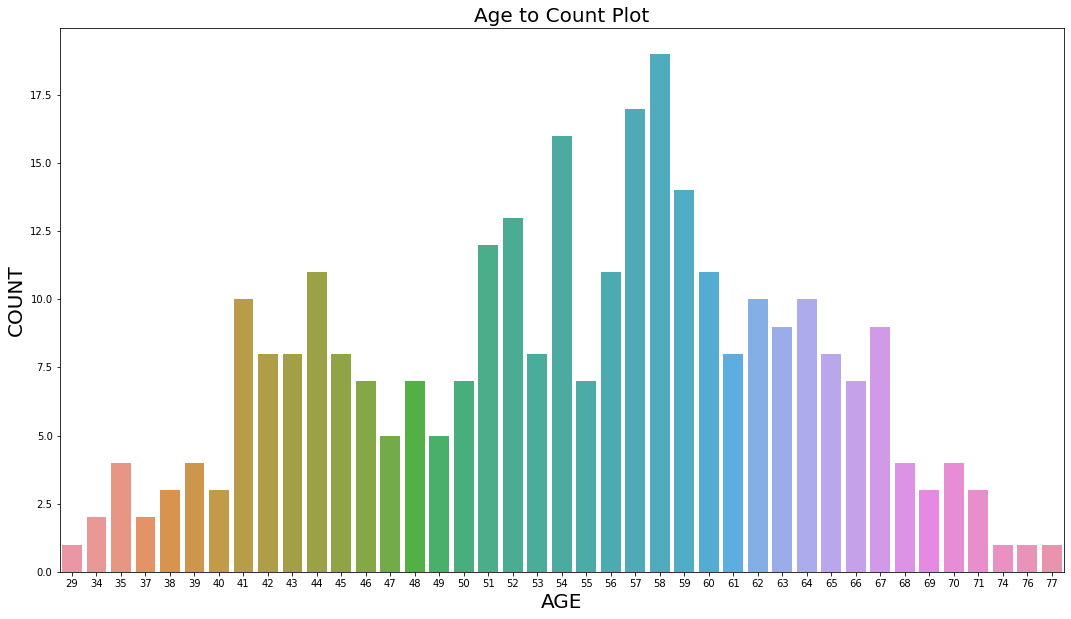

In [63]:
plt.figure(figsize=(18, 10))
sns.countplot(x=data["age"]);  # using countplot
plt.title("Age to Count Plot", fontsize=20)
plt.xlabel("AGE", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show();

People age above 40 and below 68 are more likely to get heart attack. People at the age of 58 are highly prone to heart attacks.

****CONCUSION****

1. Male are more having chances of getting heart attacks when compared to female.
2. People of age ranging from 40-68 are having more chances of getting heart attacks.
3. People whose heart rate ranging from 120-140 have more chances of getting effected.